# Connectivity graph

## Creating the input matrix

In [41]:
import pyedflib
import numpy as np

def obtain_signal_matrix(filename):
    """
    A method to obtain the (k, N) data point matrix of signals using the pyedflib package.
    Args:
        *filename*: str
            The filename to open.
    Returns:
        *sigbufs*: np.array
            A (k, N) matrix representing k channels and N samples.
    References:
    .. [1] The PyEDFlib package. To read EDF+/BDF+ files.
           http://pyedflib.readthedocs.io/en/latest/#
    """
    f = pyedflib.EdfReader(filename)
    k, N = f.signals_in_file, f.getNSamples()[0]
    
    sigbufs = np.zeros((k, N))
    for i in np.arange(k):
        sigbufs[i, :] = f.readSignal(i)
        
    return sigbufs

In [42]:
open_38 = obtain_signal_matrix(filename='../0. Dataset/eeg_data/S038R01.edf')

## Verifying the channels and signals

In [36]:
import matplotlib.pyplot as plt

def plot_signal_channel(signal, channel=0, resolution=100):
    """
    Plotting the signal of a channel using resolution samples.
    Args:
        *signal*: numpy.array
            Array with data shape (k, N), k - number of channels and N - data points
        *channel*: int
            Channel that we want to plot. Must be a number between 0 and k-1
        *resolution*: int
            Number of samples we want to plot. Must be a number between 0 and N-1.
    """
    x = np.arange(resolution)
    y = signal[channel, :resolution]
    _ = plt.plot(x, y, 'o')
    plt.show()   

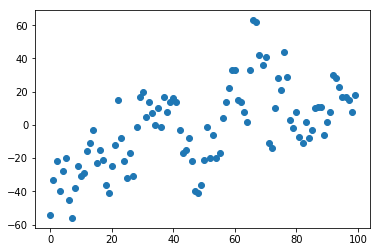

In [37]:
plot_signal_channel(open_38)

## Obtaining the mvar model with DTF

In [16]:
import connectivipy as cp

mvar = cp.mvarmodel.Mvar()
Av, Cf = mvar.fit(sigbufs)

In [20]:
print(Av.shape)

(3, 64, 64)
